## <center> ONLINE FOOD DATASET. </center>

##### IMPORT LIBRARY PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always') 

# Model Classifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Classifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

##### LOAD DATASET

In [2]:
online_food = pd.read_csv('onlinefoods.csv') 

##### DISPLAY THE DATASET

In [3]:
online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


##### DATA CLEANING

In [4]:
online_food.drop (columns=['Unnamed: 12'], inplace = True)
online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


##### DATA OVERVIEW

##### CHECK THE NUMBER OF ROWS AND COLUMNS.

In [5]:
print('The total number of rows and columns is',online_food.shape,'respectively.')

The total number of rows and columns is (388, 12) respectively.


##### CHECK FOR THE COLUMNS IN THIS DATA.

In [6]:
online_food.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

##### CHECK THE INFO OF THE DATASET

In [7]:
online_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


##### CHECK FOR DUPLICATES

In [8]:
online_food.duplicated().sum()

103

##### DISPLAY DUPLICATES ENTRIES

In [9]:
# Find duplicates
duplicates = online_food[online_food.duplicated(keep=False)]
print("Duplicate rows:")

duplicates

Duplicate rows:


,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive


##### CHECK FOR MISSING VALUES

In [10]:
online_food.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
dtype: int64

In [11]:
online_food.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


<AxesSubplot: >

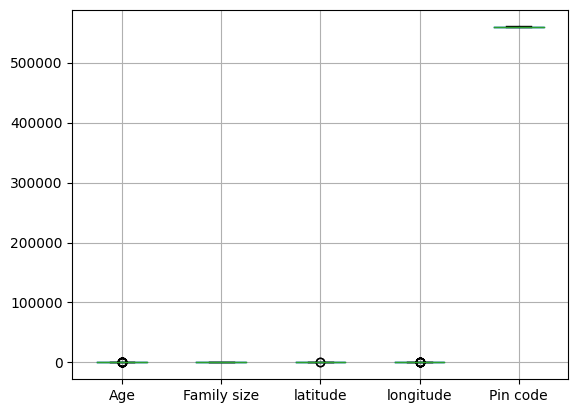

In [12]:
online_food.boxplot()

In [13]:
online_food.hist()

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Family size'}>],
       [<AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>],
       [<AxesSubplot: title={'center': 'Pin code'}>, <AxesSubplot: >]],
      dtype=object)

##### EXPLORATORY DATA ANALYSIS, (E.D.A)

##### UNIVARIATE ANALYSIS

In [14]:
# Columns to exclude from the loop
exclude_columns = ['latitude', 'longitude', 'Pin code']

# Loop through each column
for column in online_food.columns:
    # Skip excluded columns
    if column in exclude_columns:
        continue
    
    # Get unique values and their counts
    value_counts = online_food[column].value_counts()
    
    # Create bar chart
    fig = px.bar(value_counts, x=value_counts.index, y=value_counts.values, 
                 labels={'x': column, 'y': 'Count'}, 
                 title=f"Value Counts for {column}")
    
    # Show plot
    fig.show()

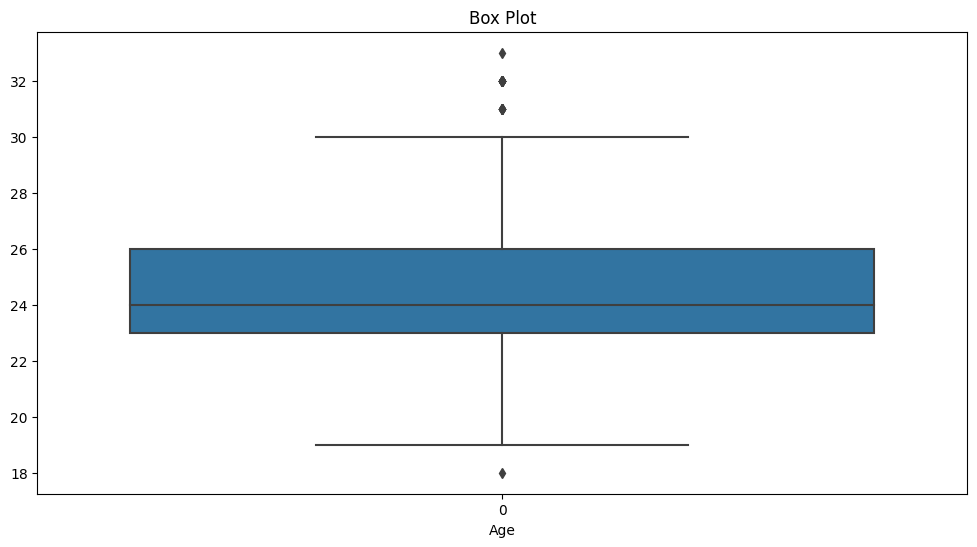

In [16]:
# Central tendency
mean_value = online_food['Age'].mean()
median_value = online_food['Age'].median()
mode_value = online_food['Age'].mode().values[0]

# Variability or dispersion
range_value = online_food['Age'].max() - online_food['Age'].min()
variance_value = online_food['Age'].var()
std_deviation_value = online_food['Age'].std()

# Skewness and Kurtosis
skewness_value = online_food['Age'].skew()
kurtosis_value = online_food['Age'].kurtosis()

# Visualization (box plot for numerical variable)
plt.figure(figsize=(12, 6))
sns.boxplot(online_food['Age'])
plt.title('Box Plot')
plt.xlabel('Age')
plt.show()

# For categorical variable, use count plot
categorical_variable = 'categorical_column_name'  # Replace 'categorical_column_name' with your categorical variable name
plt.figure(figsize=(12, 6))
sns.countplot(online_food[categorical_variable])
plt.title('Count Plot')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

##### BIVARIATE ANALYSIS

In [18]:
sns.countplot(data = online_food,x='Gender',hue='Feedback')

<AxesSubplot: xlabel='Gender', ylabel='count'>

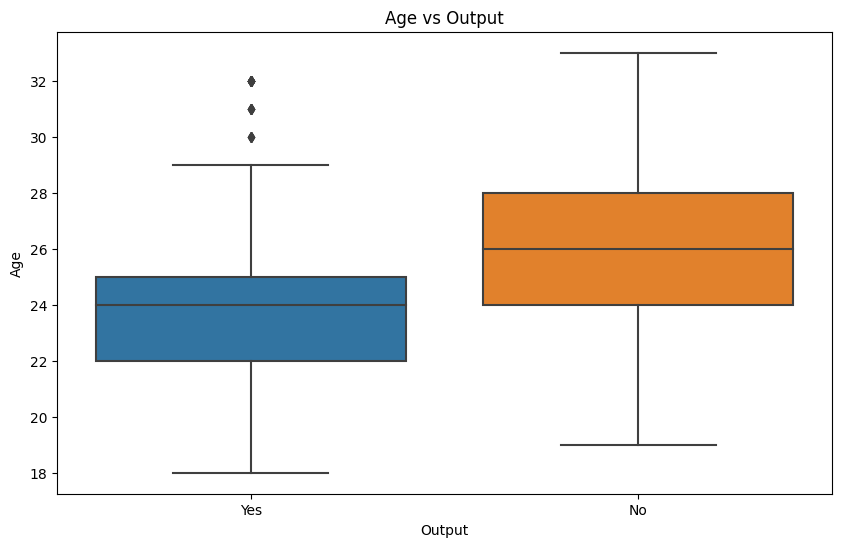

In [25]:
# Bivariate analysis for 'Age' vs 'Output'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Output', y='Age', data=online_food)
plt.title('Age vs Output')
plt.xlabel('Output')
plt.ylabel('Age')
plt.show()

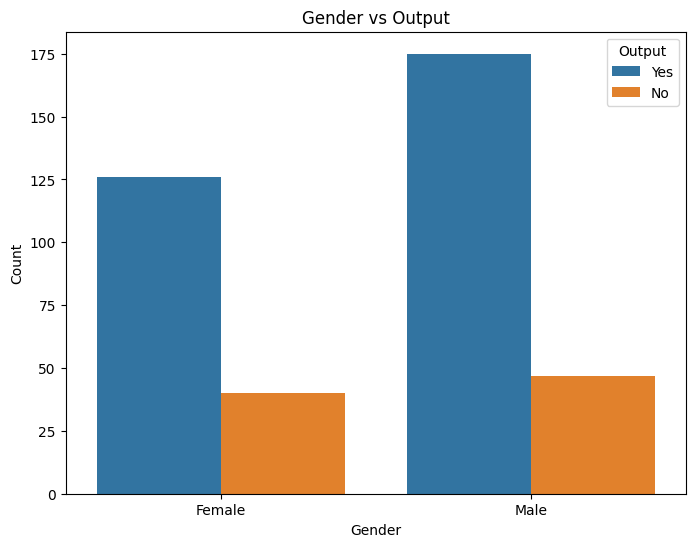

In [26]:
# Bivariate analysis for 'Gender' vs 'Output'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Output', data=online_food)
plt.title('Gender vs Output')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

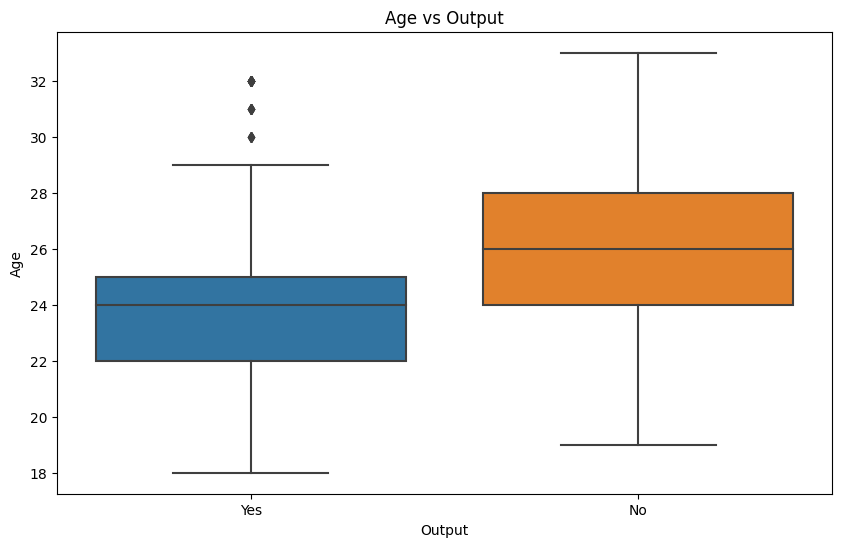

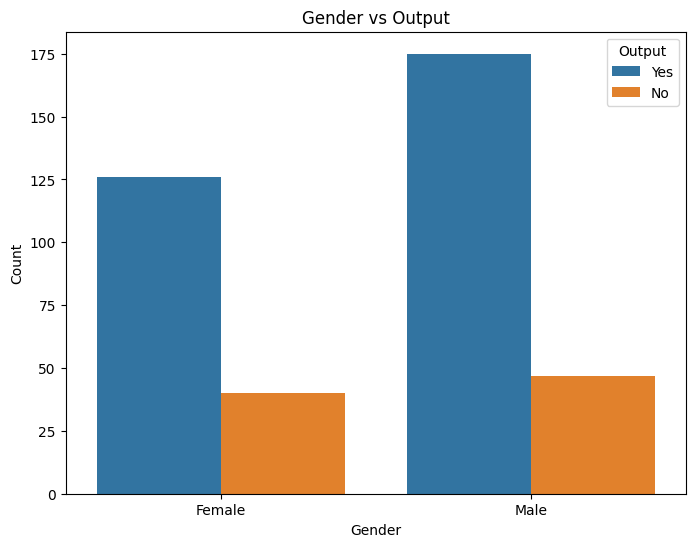

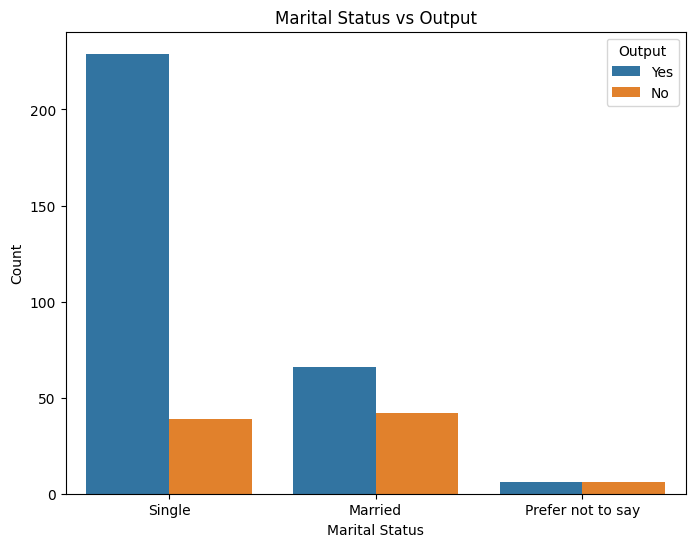

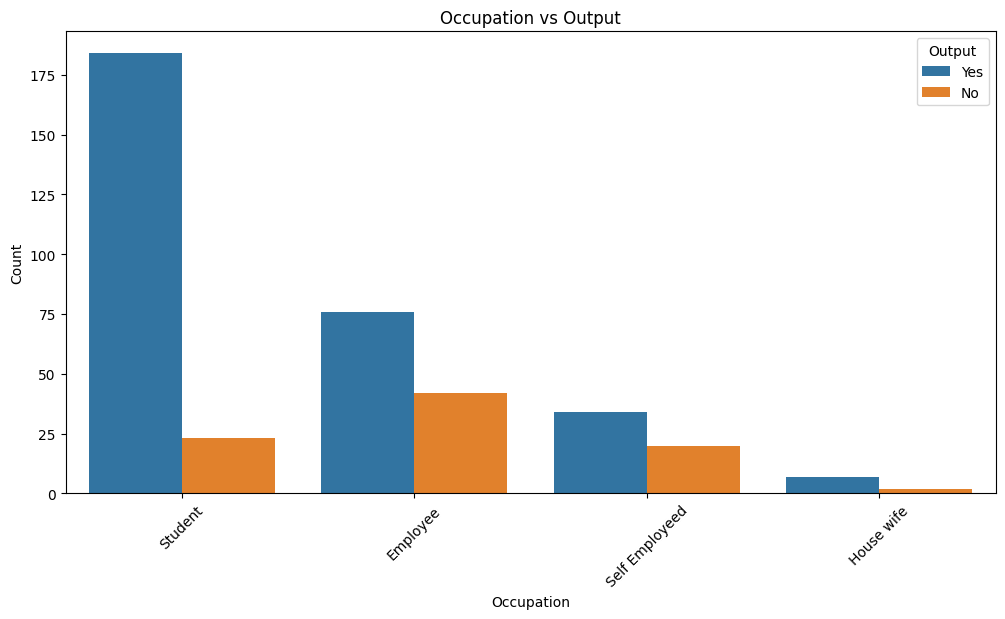

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [27]:
# Bivariate analysis for 'Age' vs 'Output'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Output', y='Age', data=online_food)
plt.title('Age vs Output')
plt.xlabel('Output')
plt.ylabel('Age')
plt.show()

# Bivariate analysis for 'Gender' vs 'Output'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Output', data=online_food)
plt.title('Gender vs Output')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bivariate analysis for 'Marital Status' vs 'Output'
plt.figure(figsize=(8, 6))
sns.countplot(x='Marital Status', hue='Output', data=online_food)
plt.title('Marital Status vs Output')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# Bivariate analysis for 'Occupation' vs 'Output'
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Output', data=online_food)
plt.title('Occupation vs Output')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Bivariate analysis for 'Monthly Income' vs 'Output'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Output', y='Monthly Income', data=online_food)
plt.title('Monthly Income vs Output')
plt.xlabel('Output')
plt.ylabel('Monthly Income')
plt.show()

# Bivariate analysis for 'Educational Qualifications' vs 'Output'
plt.figure(figsize=(8, 6))
sns.countplot(x='Educational Qualifications', hue='Output', data=online_food)
plt.title('Educational Qualifications vs Output')
plt.xlabel('Educational Qualifications')
plt.ylabel('Count')
plt.show()

# Bivariate analysis for 'Family size' vs 'Output'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Output', y='Family size', data=online_food)
plt.title('Family size vs Output')
plt.xlabel('Output')
plt.ylabel('Family size')
plt.show()

# Bivariate analysis for 'Feedback' vs 'Output'
plt.figure(figsize=(8, 6))
sns.countplot(x='Feedback', hue='Output', data=online_food)
plt.title('Feedback vs Output')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

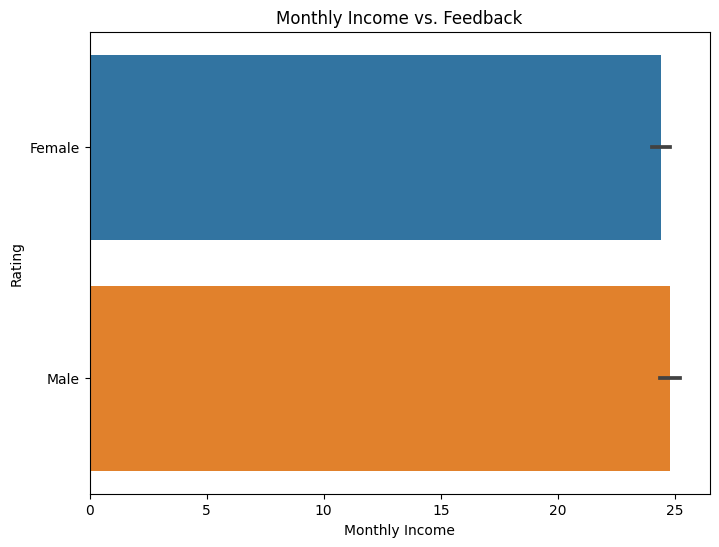

In [24]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Age', y='Gender', data=online_food)
plt.title('Monthly Income vs. Feedback')
plt.xlabel('Monthly Income')
plt.ylabel('Rating')
plt.show()

##### FEATURE ENGINEERING

##### LABEL ENCODING

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over categorical columns and apply label encoding
for column in ['Gender', 'Marital Status', 'Occupation', 'Monthly Income','Educational Qualifications','Output','Feedback']:
    online_food[column] = label_encoder.fit_transform(online_food[column].values)

# Display the encoded dataset
online_food

In [ ]:
sns.boxplot(data = online_food, x= 'Age')

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10, 8))
correlation_matrix = online_food.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Barplot of Feedback by Occupation and Educational Qualifications
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Feedback', hue='Educational Qualifications', data=online_food)
plt.title('Feedback by Occupation and Educational Qualifications')
plt.xlabel('Occupation')
plt.ylabel('Feedback')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Pairplot for numerical variables
sns.pairplot(online_food, hue='Output', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables with Output Label', y=10.02)
plt.show()

In [ ]:
# Boxplot of Rating by Gender and Marital Status
plt.figure(figsize=(10, 8))
sns.boxplot(x='Gender', y='Feedback', hue='Marital Status', data=online_food)
plt.title('Rating by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Feedback')
plt.show()

##### IDENTIFY TRENDS AND PATTERNS WITHIN THIS DATA

In [ ]:
# Patterns and Trends Analysis
# Example: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(online_food['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Monthly income vs. Family size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Monthly Income', y='Family size', data=online_food)
plt.title('Monthly Income vs. Family size')
plt.xlabel('Monthly Income')
plt.ylabel('Family size')
plt.show()

# Example: Rating distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Rating', data=online_food)
plt.title('Rating Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

# Example: Feedback sentiment analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='Feedback', data=online_food)
plt.title('Feedback Sentiment Analysis')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

##### MULTIVARIATE ANALYSIS

In [ ]:
# Exclude columns that are not relevant for multivariate analysis
exclude_columns = ['latitude', 'longitude', 'Pin code']

# Select relevant columns for analysis
selected_columns = [col for col in online_food.columns if col not in exclude_columns]

# Pairplot for numerical variables
sns.pairplot(online_food.copy[selected_columns], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 8))
correlation_matrix = online_food[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of Rating by Gender and Marital Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Rating', hue='Marital Status', data=online_food)
plt.title('Rating by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

# Barplot of Feedback by Occupation and Educational Qualifications
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Feedback', hue='Educational Qualifications', data=online_food)
plt.title('Feedback by Occupation and Educational Qualifications')
plt.xlabel('Occupation')
plt.ylabel('Feedback')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Visualize distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(online_food['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Visualize distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(online_food['Family size'], bins=20, kde=True)
plt.title('Distribution of Family size')
plt.xlabel('Family size')
plt.ylabel('Frequency')
plt.show()

In [ ]:
online_food.dtypes